In [1]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
df = pd.read_csv('P1training.csv', parse_dates=True, index_col=0)
print(df.head())

from sklearn.model_selection import KFold, train_test_split
# split into test and train sets
train, test = train_test_split(df, test_size=0.2, random_state=5)
print(train.head())
print(test.head())
print('n_train:',len(train))
print('n_test:',len(test))

                     Appliances  lights     T1       RH_1    T2       RH_2  \
date                                                                         
2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   
2016-01-11 17:50:00          50      40  19.89  46.026667  19.2  44.500000   

                        T3       RH_3         T4       RH_4    ...        T8  \
date                                                           ...             
2016-01-11 17:00:00  19.79  44.730000  19.000000  45.566667    ...      18.2   
2016-01-11 17:10:00  19.79  44.790000  19.000000  45.992500    ...      18.2   
2016-01-11 17:20:00  19.79  44.933333  18.926667  45.890000    ...      18.2   
2016-01-11 17:40:00  19.79  45.000000  18.890000  45.

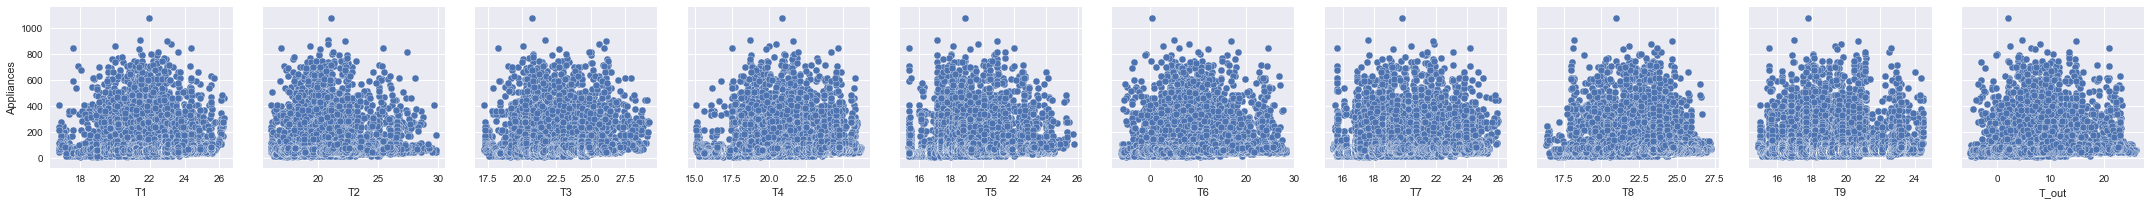

In [3]:
%matplotlib inline
pp = sns.pairplot(data=df,
                  y_vars=['Appliances'],
                  x_vars=['T1', 'T2', 'T3','T4','T5', 'T6', 'T7','T8','T9', 'T_out'],
                  size= 3)


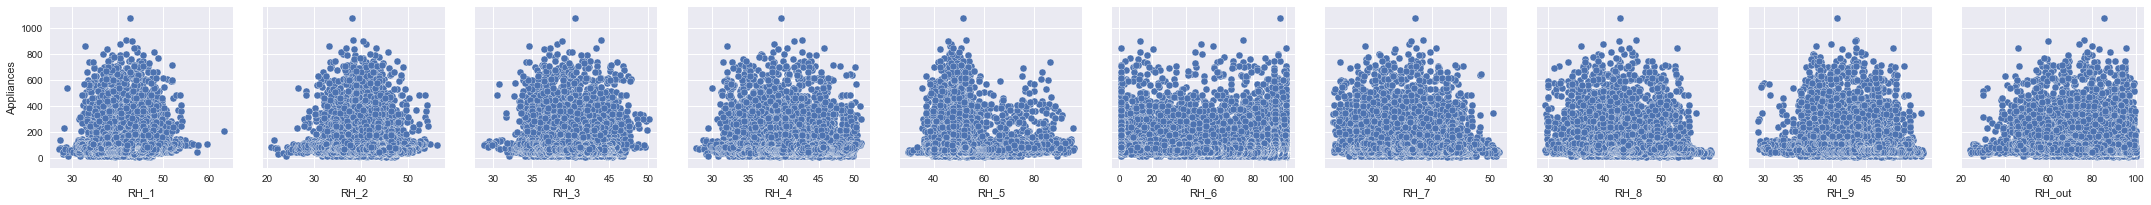

In [4]:
%matplotlib inline
pp = sns.pairplot(data=df,
                  y_vars=['Appliances'],
                  x_vars=['RH_1', 'RH_2', 'RH_3','RH_4','RH_5', 'RH_6', 
                          'RH_7','RH_8','RH_9','RH_out'],
                  size= 3)


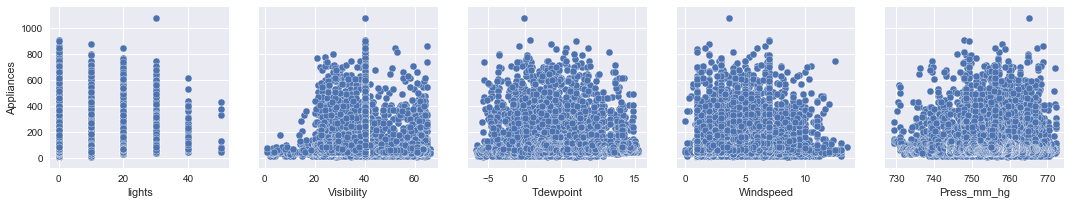

In [5]:
%matplotlib inline
pp = sns.pairplot(data=df,
                  y_vars=['Appliances'],
                  x_vars=['lights', 'Visibility', 'Tdewpoint','Windspeed','Press_mm_hg'],
                  size= 3)


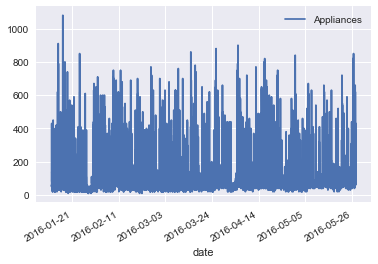

In [6]:
%matplotlib inline
df.plot(y='Appliances')


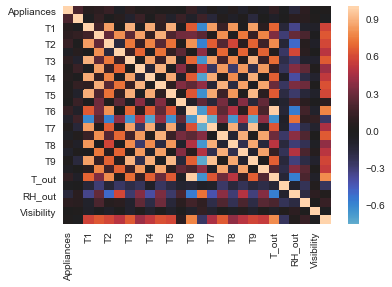

In [7]:
ax = sns.heatmap(df.corr(), center=0)

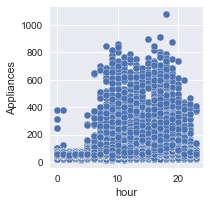

In [8]:
%matplotlib inline
hours = df.index.hour
new_df = df.copy()
new_df['hour'] = hours
new_df.head()
pp = sns.pairplot(data=new_df,
                  x_vars='hour',
                  y_vars='Appliances',
                  size=3)

In [9]:
#get list of predictor names
feat_cols = ['RH_8', 'T3', 'RH_1', 'T9', 'RH_2']

#dimensions
d = train.shape

#numper of instances
n = train.shape[0]

#number of input variables for regression
p = train.shape[1] - 1

print('We have n={} rows, {} columns, of which p={} explanatory variables'.format(n, d[1], p))

We have n=11842 rows, 26 columns, of which p=25 explanatory variables


In [10]:
#list of variables and their types
print(train.dtypes)

Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
dtype: object


In [11]:
# launching analysis
# regression using formula
import statsmodels.formula.api as smf

#instantiate model
model = smf.ols('Appliances ~ {}'.format(' + '.join(feat_cols)), data=train)

#fit the model
results = model.fit()

#detailed results
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Appliances   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     338.8
Date:                Sun, 16 Sep 2018   Prob (F-statistic):               0.00
Time:                        00:00:36   Log-Likelihood:                -70814.
No. Observations:               11842   AIC:                         1.416e+05
Df Residuals:                   11836   BIC:                         1.417e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    108.8541     12.594      8.643      0.000      84.168     133.540
RH_8          -7.1016      0.270    -26.348      0.000      -7.630      -6.573
T3            21.5259      1.095     19.657      0.000      19.379      23.673
RH_1          12.7378      0.430     29.593      0.000      11.894      13.582
T9           -23.1918      1.083    -21.423      0.000     -25.314     -21.070
RH_2          -6.0995      0.373    -16.366      0.000      -6.830      -5.369
==============================================================================
Omnibus:                     8141.822   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           109296.601
Skew:                           3.231   Prob(JB):                         0.00
Kurtosis:                      16.407   Cond. No.                     1.11e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
pvalues = results.pvalues
print('pvalues {}\n'.format(pvalues))
p_dict = pvalues.to_dict()
pvalue_threshold = 0.05
for key, value in p_dict.items():
    if value >= pvalue_threshold:
        print('keys to remove',key)
        if key == 'Intercept':
            continue
        else:
            print('removing...')
            feat_cols.remove(key)
print(feat_cols)

pvalues Intercept     6.160440e-18
RH_8         1.014377e-148
T3            1.129208e-84
RH_1         9.715790e-186
T9           6.423776e-100
RH_2          1.512116e-59
dtype: float64

['RH_8', 'T3', 'RH_1', 'T9', 'RH_2']


In [13]:
#run model again after removing variables that are not significant at 5% level
#instantiate model
model = smf.ols('Appliances ~ {}'.format(' + '.join(feat_cols)), data=train)

#fit the model
results = model.fit()

#detailed results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Appliances   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     338.8
Date:                Sun, 16 Sep 2018   Prob (F-statistic):               0.00
Time:                        00:00:36   Log-Likelihood:                -70814.
No. Observations:               11842   AIC:                         1.416e+05
Df Residuals:                   11836   BIC:                         1.417e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    108.8541     12.594      8.643      0.000      84.168     133.540
RH_8          -7.1016      0.270    -26.348      0.000      -7.630      -6.573
T3            21.5259      1.095     19.657      0.000      19.379      23.673
RH_1          12.7378      0.430     29.593      0.000      11.894      13.582
T9           -23.1918      1.083    -21.423      0.000     -25.314     -21.070
RH_2          -6.0995      0.373    -16.366      0.000      -6.830      -5.369
==============================================================================
Omnibus:                     8141.822   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           109296.601
Skew:                           3.231   Prob(JB):                         0.00
Kurtosis:                      16.407   Cond. No.                     1.11e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
pvalues = results.pvalues
print('pvalues {}\n'.format(pvalues))
p_dict = pvalues.to_dict()
pvalue_threshold = 0.05
for key, value in p_dict.items():
    if value >= pvalue_threshold:
        print('keys to remove',key)
        if key == 'Intercept':
            continue
        else:
            print('removing...')
            feat_cols.remove(key)
print(feat_cols)

pvalues Intercept     6.160440e-18
RH_8         1.014377e-148
T3            1.129208e-84
RH_1         9.715790e-186
T9           6.423776e-100
RH_2          1.512116e-59
dtype: float64

['RH_8', 'T3', 'RH_1', 'T9', 'RH_2']


In [15]:
#run model again after removing variables that are not significant at 5% level
#instantiate model
model = smf.ols('Appliances ~ {}'.format(' + '.join(feat_cols)), data=train)

#fit the model
results = model.fit()

#detailed results
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Appliances   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     338.8
Date:                Sun, 16 Sep 2018   Prob (F-statistic):               0.00
Time:                        00:00:36   Log-Likelihood:                -70814.
No. Observations:               11842   AIC:                         1.416e+05
Df Residuals:                   11836   BIC:                         1.417e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    108.8541     12.594      8.643      0.000      84.168     133.540
RH_8          -7.1016      0.270    -26.348      0.000      -7.630      -6.573
T3            21.5259      1.095     19.657      0.000      19.379      23.673
RH_1          12.7378      0.430     29.593      0.000      11.894      13.582
T9           -23.1918      1.083    -21.423      0.000     -25.314     -21.070
RH_2          -6.0995      0.373    -16.366      0.000      -6.830      -5.369
==============================================================================
Omnibus:                     8141.822   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           109296.601
Skew:                           3.231   Prob(JB):                         0.00
Kurtosis:                      16.407   Cond. No.                     1.11e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
pvalues = results.pvalues
print('pvalues {}\n'.format(pvalues))
p_dict = pvalues.to_dict()
pvalue_threshold = 0.05
for key, value in p_dict.items():
    if value >= pvalue_threshold:
        print('keys to remove',key)
        if key == 'Intercept':
            continue
        else:
            print('removing...')
            feat_cols.remove(key)
print(feat_cols)

pvalues Intercept     6.160440e-18
RH_8         1.014377e-148
T3            1.129208e-84
RH_1         9.715790e-186
T9           6.423776e-100
RH_2          1.512116e-59
dtype: float64

['RH_8', 'T3', 'RH_1', 'T9', 'RH_2']


In [17]:
#estimated coefficients 
print(results.params) 

#R2 
print(results.rsquared) 

#calculating the F-statistic 
F = results.mse_model / results.mse_resid 
print(F) 

#F provided by the results object 
print(results.fvalue)

Intercept    108.854082
RH_8          -7.101625
T3            21.525929
RH_1          12.737821
T9           -23.191764
RH_2          -6.099472
dtype: float64
0.1252135588049894
338.8318822114609
338.8318822114609


In [18]:
#This test checks if the observed skewness and kurtosis matching a normal distribution. 
#Jarque-Bera normality test
#a large J-B value indicates that errors are not normally distributed
#Samples from a normal distribution have an expected skewness of 0 
#and an expected excess kurtosis of 0 (which is the same as a kurtosis of 3)
import statsmodels.api as sm
JB, JBpv, skw, kurt = sm.stats.stattools.jarque_bera(results.resid)
print('JB:',JB)
print('JBpv:',JBpv)
print('Skewness:',skw)
print('Kurtosis:',kurt)

JB: 109296.60092425204
JBpv: 0.0
Skewness: 3.230916466817177
Kurtosis: 16.407254080775704


The model has a skewness of 3.23 and a kurtosis of 16.40.
This indicates that the model violates the normality assumption.

## Residual Analysis

### How to check for autocorrelation:

* Look for Durbin – Watson (DW) statistic. It must lie between 0 and 4. If DW = 2, implies no autocorrelation, 0 < DW < 2 implies positive autocorrelation while 2 < DW < 4 indicates negative autocorrelation.

According to the summary, we have a DW of 1.994, indicating a positive auto-correlation.

* Look for the seasonal or correlated pattern in residual values in residual vs time plot. i.e. Independence check/test.

* Dependent variable and the error terms must possess a normal distribution. Presence of non – normal distribution suggests that there are a few unusual data points which must be studied closely to make a better model. This can be done graphically using QQ-plot and a histogram plotting normalized residuals.

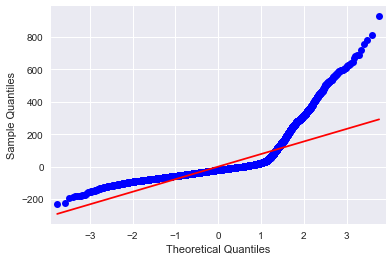

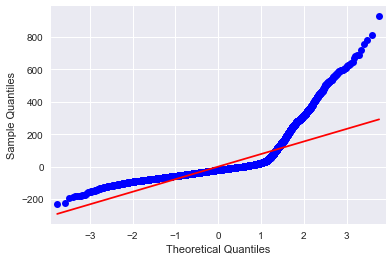

In [19]:
#Normal probability plot. 
#The normal probability plot is a graphical technique to identify substantive departures from normality. 
#It is based on the comparison between the observed distribution 
#and the theoretical distribution under the normal assumption. 
#The null hypothesis (normal distribution) is rejected if the points are not aligned on a straight line. 
#We use the qqplot() procedure.
import scipy.stats as stats
#qqpolot vs. normal distribution 
sm.qqplot(results.resid, stats.distributions.norm, line='r')

In [20]:
#Detection of outliers and influential points
influence = results.get_influence()

#determine leverage
print(influence.hat_matrix_diag)

[0.00120922 0.00108234 0.00027481 ... 0.00059436 0.00241392 0.0002572 ]


In [21]:
#internally studentized residuals
print(influence.resid_studentized_internal)

[ 0.85902276 -0.51918969  0.21662446 ... -0.41455129 -0.95958209
 -0.31872687]


In [22]:
#checking the values of the internally studentized residuals
import numpy as np
residus = results.resid.values #residuals
leverages = influence.hat_matrix_diag #leverage
sigma_err = np.sqrt(results.scale) #regression standard error
res_stds = residus/(sigma_err*np.sqrt(1.0-leverages))
print(res_stds)

[ 0.85902276 -0.51918969  0.21662446 ... -0.41455129 -0.95958209
 -0.31872687]


In [23]:
#checking externally studenized residuals with the formula
res_studs = res_stds*np.sqrt((n-p-2)/(n-p-1-res_stds**2))
print(res_studs)

[ 0.85901323 -0.51917364  0.21661573 ... -0.41453676 -0.95957887
 -0.31871475]


In [24]:
#threshold leverage
threshold_leverage = 2*(p+1)/n
print(threshold_leverage)
#identification
atypical_leverage = leverages > threshold_leverage
print(atypical_leverage)


0.004391150143556831
[False False False ... False False False]


In [25]:
#which variables?
print(train.index[atypical_leverage],leverages[atypical_leverage])
print('Number of atypical leverages:', len(train.index[atypical_leverage]))

DatetimeIndex(['2016-01-30 19:30:00', '2016-01-21 19:20:00',
               '2016-02-09 19:30:00', '2016-01-30 19:40:00'],
              dtype='datetime64[ns]', name='date', freq=None) [0.00880776 0.00525752 0.00551158 0.00572832]
Number of atypical leverages: 4


In [26]:
#threshold externally studentized residuals
import scipy
threshold_stud = scipy.stats.t.ppf(0.975,df=n-p-2)
print(threshold_stud)
#detection - absolute value > threshold
atypical_stud = np.abs(res_studs) > threshold_stud
#which ones?
print(train.index[atypical_stud],res_studs[atypical_stud])
print('Number of atypical externally studentized residuals:', len(train.index[atypical_stud]))

1.9601647894608945
DatetimeIndex(['2016-03-14 16:40:00', '2016-03-25 11:30:00',
               '2016-01-14 10:40:00', '2016-05-01 16:50:00',
               '2016-02-08 18:20:00', '2016-04-24 09:40:00',
               '2016-02-23 18:30:00', '2016-01-31 09:20:00',
               '2016-01-23 17:20:00', '2016-05-19 17:50:00',
               ...
               '2016-05-08 08:20:00', '2016-03-10 18:20:00',
               '2016-01-18 21:20:00', '2016-02-14 09:00:00',
               '2016-05-12 17:40:00', '2016-02-22 11:20:00',
               '2016-02-26 08:50:00', '2016-03-21 06:40:00',
               '2016-05-06 07:30:00', '2016-02-15 19:40:00'],
              dtype='datetime64[ns]', name='date', length=658, freq=None) [ 3.96240459  3.78638351  5.23195327  2.49348336  2.98204268  2.57172226
  2.00719399  2.80113542  3.45334768  4.22707548  2.8580069   4.03734463
  5.46614805  2.2480636   2.82801143  5.73437057  7.1840391   5.40288646
  3.37742364  2.88965905  3.31910677  2.39274353  2.963679

In [27]:
#Combination of leverage and externally studentized residuals
#suspicious observations with one of the two criteria
pbm_infl = np.logical_or(atypical_leverage,atypical_stud)
print(train.index[pbm_infl])
print('Number of observations with one or 2 more criteria:', len(train.index[pbm_infl]))

DatetimeIndex(['2016-03-14 16:40:00', '2016-03-25 11:30:00',
               '2016-01-14 10:40:00', '2016-05-01 16:50:00',
               '2016-02-08 18:20:00', '2016-04-24 09:40:00',
               '2016-02-23 18:30:00', '2016-01-31 09:20:00',
               '2016-01-23 17:20:00', '2016-05-19 17:50:00',
               ...
               '2016-05-08 08:20:00', '2016-03-10 18:20:00',
               '2016-01-18 21:20:00', '2016-02-14 09:00:00',
               '2016-05-12 17:40:00', '2016-02-22 11:20:00',
               '2016-02-26 08:50:00', '2016-03-21 06:40:00',
               '2016-05-06 07:30:00', '2016-02-15 19:40:00'],
              dtype='datetime64[ns]', name='date', length=658, freq=None)
Number of observations with one or 2 more criteria: 658


In [28]:
#Multi-collinearity problem
#correlation matrix 
import scipy
df_exog = train[feat_cols]
mc = scipy.corrcoef(df_exog,rowvar=0) 
print(mc)
# Correlation matrix. 
# A rule of thumb is to compare the absolute value of the correlation between 
# each pair of variables with the threshold value 0.8.

[[ 1.          0.04741281  0.73568714 -0.11167285  0.67781802]
 [ 0.04741281  1.          0.25963628  0.90006133  0.14397704]
 [ 0.73568714  0.25963628  1.          0.12123353  0.79695631]
 [-0.11167285  0.90006133  0.12123353  1.          0.06124096]
 [ 0.67781802  0.14397704  0.79695631  0.06124096  1.        ]]


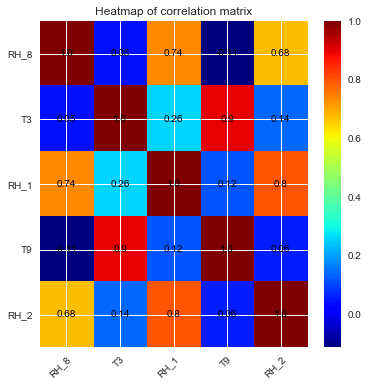

In [52]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
im = ax.imshow(mc, cmap=plt.cm.jet, aspect='auto')
ax.set_title('Heatmap of correlation matrix')
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
rotation_mode="anchor")
# We want to show all ticks...
ax.set_xticks(np.arange(len(feat_cols)))
ax.set_yticks(np.arange(len(feat_cols)))
# ... and label them with the respective list entries
ax.set_xticklabels(feat_cols)
ax.set_yticklabels(feat_cols)
# Loop over data dimensions and create text annotations.
for i in range(len(feat_cols)):
    for j in range(len(feat_cols)):
        text = ax.text(j, i, round(mc[i, j], 2),
        ha="center", va="center", color="black")
# set colorbar
fig.colorbar(im, ax=ax, orientation='vertical')
             
plt.show()

In [30]:
# Klein’s rule of thumb 
# Klein’s rule of thumb. It consists in comparing the square of the correlation between the pairs
# of predictors with the overall R2 (R² = 0.169) of the regression. 
# It is interesting because it takes into account the characteristics of the regression.

mc2 = mc**2 
print(mc2)

[[1.         0.00224797 0.54123557 0.01247083 0.45943726]
 [0.00224797 1.         0.067411   0.8101104  0.02072939]
 [0.54123557 0.067411   1.         0.01469757 0.63513935]
 [0.01247083 0.8101104  0.01469757 1.         0.00375046]
 [0.45943726 0.02072939 0.63513935 0.00375046 1.        ]]


In [31]:
#VIF criterion 
#Variance Inflation
#A possible rule for multicollinearity detection is (VIF > 4). 
import statsmodels.stats as sms
vif = np.linalg.inv(mc) 
print(vif)
inf = sms.outliers_influence.OLSInfluence(results) ##can't run this, hangs the kernel
print(inf.summary_table())

[[ 2.57655973 -0.64103605 -1.33776374  1.06689668 -0.65334266]
 [-0.64103605  6.25250448 -1.02438627 -5.61757829  0.69470571]
 [-1.33776374 -1.02438627  3.77779776  0.43607571 -1.98319698]
 [ 1.06689668 -5.61757829  0.43607571  6.16158871 -0.63923442]
 [-0.65334266  0.69470571 -1.98319698 -0.63923442  2.96249443]]
       obs      endog     fitted     Cook's   student.   hat diag    dffits   ext.stud.     dffits
                           value          d   residual              internal   residual           
--------------------------------------------------------------------------------------------------
         0    250.000    167.845      0.000      0.859      0.001      0.030      0.859      0.030
         1     70.000    119.657      0.000     -0.519      0.001     -0.017     -0.519     -0.017
         2    120.000     99.273      0.000      0.217      0.000      0.004      0.217      0.004
         3     50.000    119.715      0.000     -0.729      0.000     -0.014     -0.729   

In [32]:
## Making predictions
## https://ec.europa.eu/eurostat/statistics-explained/index.php/Glossary:In-sample_vs._out-of-sample_forecasts
## Punctual Predictions (out-of-sample prediction)
#no. of instances
n_pred = test.shape[0]
#predictor columns
test_exog = test[feat_cols]
#add a column of 1
test_exog = sm.add_constant(test_exog)
print(test_exog)

                     const       RH_8         T3       RH_1         T9  \
date                                                                     
2016-02-23 23:30:00    1.0  45.463333  21.000000  41.090000  18.200000   
2016-02-07 12:10:00    1.0  47.880000  21.500000  44.526667  19.200000   
2016-05-02 17:30:00    1.0  40.230000  22.926667  37.200000  19.790000   
2016-05-03 12:00:00    1.0  39.933333  23.200000  38.626667  20.290000   
2016-01-20 11:00:00    1.0  42.030000  18.390000  36.900000  15.800000   
2016-01-30 04:10:00    1.0  53.663333  19.823333  44.090000  16.390000   
2016-04-12 13:30:00    1.0  40.442857  23.200000  41.900000  21.230000   
2016-01-17 13:00:00    1.0  43.730000  22.100000  38.060000  18.000000   
2016-03-23 08:40:00    1.0  41.590000  22.100000  39.826667  19.760000   
2016-04-28 21:30:00    1.0  35.500000  22.700000  33.500000  18.700000   
2016-04-12 20:40:00    1.0  42.868571  25.963333  43.500000  21.100000   
2016-01-16 09:10:00    1.0  49.530000 

In [33]:
#punctual prediction by applying the regression coefficients
y_pred = model.predict(results.params,test_exog)
print(y_pred)
print(len(y_pred))

[ 89.10103902  93.30282322 126.45056001 ...  92.17893315 131.82225367
  74.11187792]
2961


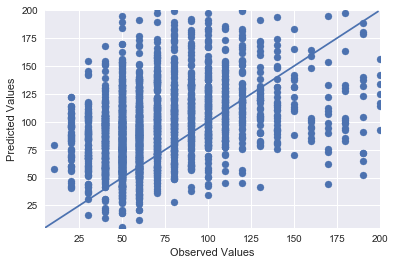

In [34]:
#comparison obs. Vs. pred.
plt.scatter(test['Appliances'],y_pred)
plt.plot(np.arange(5,200),np.arange(5,200))
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.xlim(5,200)
plt.ylim(5,200)
plt.show()

In [35]:
## checking MSE
from sklearn.metrics import (accuracy_score, mean_absolute_error,
                             mean_squared_error, r2_score)
print('MAE:', mean_absolute_error(test['Appliances'], y_pred))
print('RMSE:', np.sqrt(mean_squared_error(test['Appliances'], y_pred)))
print('R-Squared:', r2_score(test['Appliances'], y_pred))

MAE: 55.49841964954076
RMSE: 98.64200709464752
R-Squared: 0.11632674397908438



CHECKING RESIDUALS



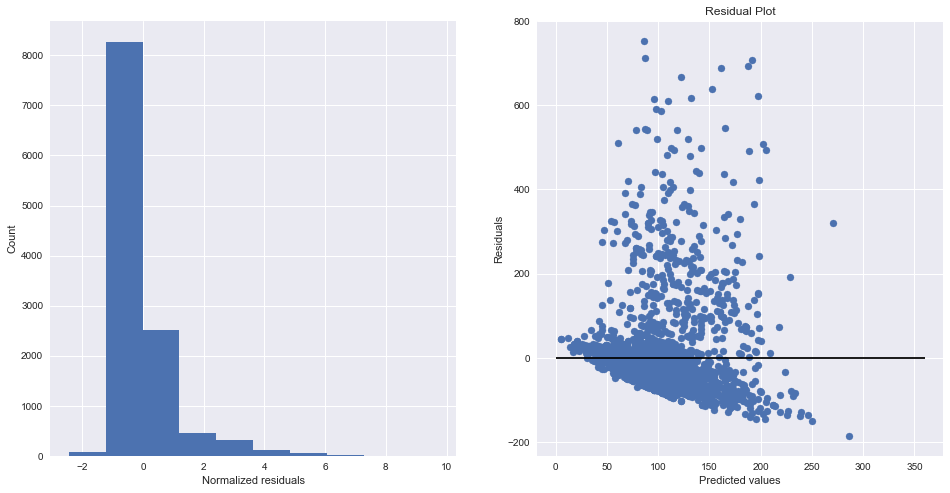

In [36]:
print('\nCHECKING RESIDUALS\n')
residual = test['Appliances'] - y_pred
fig, ax = plt.subplots(1,2, figsize=(16,8))
# axes are in a two-dimensional array, indexed by [row, col]
ax[0].hist(results.resid_pearson)
ax[0].set_ylabel('Count')
ax[0].set_xlabel('Normalized residuals')
ax[1].scatter(y_pred, residual)
ax[1].set_title('Residual Plot')
ax[1].set_xlabel('Predicted values')
ax[1].set_ylabel('Residuals')
ax[1].hlines(y = 0, xmin = 0, xmax = 360)


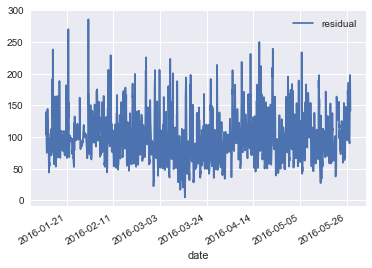

In [37]:
#residual vs time plot. i.e. Independence check/test.
res_df = test.copy()
res_df['residual'] = y_pred
res_df.head()
res_df.index
%matplotlib inline
res_df.plot(y='residual')

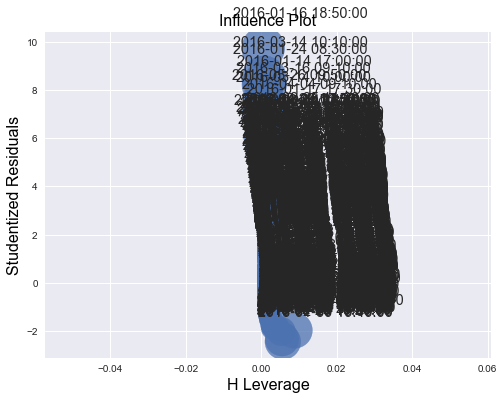

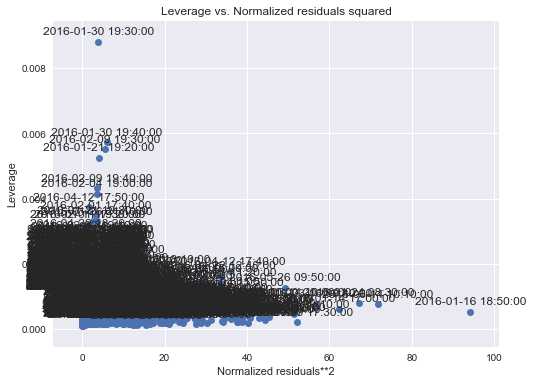

In [38]:
## CAN NOT RUN THIS
#### The influence of each point can be visualized by the criterion keyword argument. 
## Options are Cook's distance and DFFITS, two measures of influence.
fig, ax = plt.subplots(figsize=(8,6))
fig = sm.graphics.influence_plot(results, ax=ax, criterion="cooks")

fig1, ax = plt.subplots(figsize=(8,6))
fig1 = sm.graphics.plot_leverage_resid2(results, ax=ax)
 

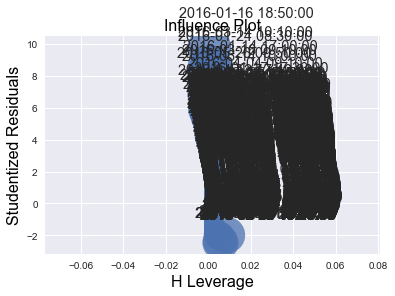

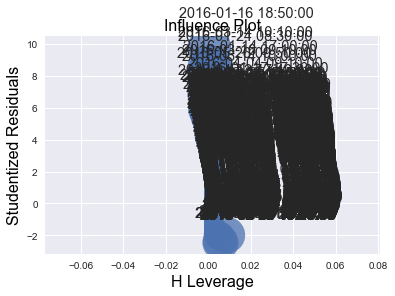

In [39]:
#graphical representation of the influences()
sm.graphics.influence_plot(results)
## can't seem to run this

[1.48897400e-04 4.86782191e-05 2.14992499e-06 ... 1.70338043e-05
 3.71352251e-04 4.35586421e-06] [1. 1. 1. ... 1. 1. 1.]


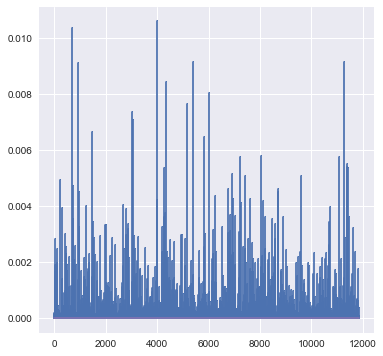

In [40]:
## Plotting cooks distance
#c is the distance and p is p-value
(c, cook_p) = influence.cooks_distance
print(c,cook_p)
fig = plt.figure(figsize=(6,6))
fig = plt.stem(np.arange(len(c)), c, markerfmt=",")

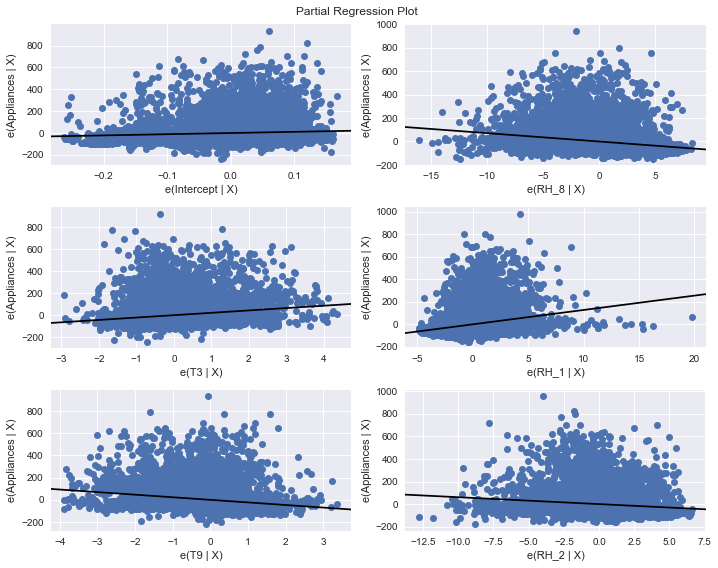

In [41]:
## Partial Regression
import statsmodels.api as sm
fig  = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_partregress_grid(results, fig=fig)



In [42]:
## Standard error of the prediction
# prediction interval
#retrieving the matrix (X'X)-1 
inv_xtx = model.normalized_cov_params 
print(inv_xtx)

[[ 1.73198029e-02 -6.85780535e-05 -2.65955489e-04 -9.87068874e-06
  -1.69725633e-04 -1.15290733e-04]
 [-6.85780535e-05  7.93321897e-06 -5.14777834e-06 -5.43223826e-06
   8.53199742e-06 -2.59406466e-06]
 [-2.65955489e-04 -5.14777834e-06  1.30954238e-04 -1.08490396e-05
  -1.17167090e-04  7.19397302e-06]
 [-9.87068874e-06 -5.43223826e-06 -1.08490396e-05  2.02315081e-05
   4.59918003e-06 -1.03847440e-05]
 [-1.69725633e-04  8.53199742e-06 -1.17167090e-04  4.59918003e-06
   1.27979433e-04 -6.59202817e-06]
 [-1.15290733e-04 -2.59406466e-06  7.19397302e-06 -1.03847440e-05
  -6.59202817e-06  1.51679843e-05]]


In [43]:
#description of the new instances: transformation in matrix 
X_pred = test_exog.values

In [44]:
#### squared value of the standard error of the prediction 
### 
#initialization 
var_err = np.zeros((n_pred,)) 
#for each individual to process 
for i in range(n_pred): 
    #description of the individual 
    tmp = X_pred[i,:] 
    #matrix product 
    pm = np.dot(np.dot(tmp,inv_xtx),np.transpose(tmp)) 
    #squared values 
    var_err[i] = results.scale * (1 + pm) # 

In [45]:
## Confidence interval. Now we calculate the lower and upper bounds for a 95% confidence level, 
## using the quantile of the Student distribution and the punctual prediction
#quantile of the Student distribution (0.975) 
qt = scipy.stats.t.ppf(0.975,df=n-p-1)
#lower bound 
y_low = y_pred - qt * np.sqrt(var_err)
print(y_low) 
#upper bound 
y_high = y_pred + qt * np.sqrt(var_err) 
print(y_high)

[ -98.4921742   -94.30799167  -61.17039974 ...  -95.41891967  -55.79068087
 -113.49035136]
[276.69425224 280.91363811 314.07151975 ... 279.77678596 319.43518821
 261.7141072 ]


In [46]:
#matrix with the various values (lower bound, observed, upper bound) 
a = np.resize(y_low,new_shape=(n_pred,1)) 
y_obs = test['Appliances'] 
a = np.append(a,np.resize(y_obs,new_shape=(n_pred,1)),axis=1) 
a = np.append(a,np.resize(y_high,new_shape=(n_pred,1)),axis=1) 
#transforming in a data frame object to obtain better displaying 
display_df = pd.DataFrame(a) 
display_df.index = test.index 
display_df.columns = ['Lower bound','Y.Obs','Upper bound'] 
print(display_df)

                     Lower bound  Y.Obs  Upper bound
date                                                
2016-02-23 23:30:00   -98.492174   50.0   276.694252
2016-02-07 12:10:00   -94.307992   40.0   280.913638
2016-05-02 17:30:00   -61.170400  240.0   314.071520
2016-05-03 12:00:00   -34.285046   50.0   341.043982
2016-01-20 11:00:00  -108.512000   90.0   266.727362
2016-01-30 04:10:00  -118.580152   20.0   256.695231
2016-04-12 13:30:00   -49.454462   60.0   325.819709
2016-01-17 13:00:00   -69.427513  120.0   305.813756
2016-03-23 08:40:00  -117.121082   80.0   258.099962
2016-04-28 21:30:00   -56.204867   50.0   319.086096
2016-04-12 20:40:00   -20.824704  310.0   354.487525
2016-01-16 09:10:00  -112.352498   60.0   262.875513
2016-03-31 07:50:00  -134.873833   70.0   240.348874
2016-02-25 13:20:00   -11.628997  350.0   363.677395
2016-05-24 05:40:00  -106.085240  340.0   269.193214
2016-02-03 17:10:00   -22.647557  250.0   352.625371
2016-05-24 20:20:00   -71.997737   90.0   303.

In [47]:
display_df.dtypes

Lower bound    float64
Y.Obs          float64
Upper bound    float64
dtype: object

In [48]:
# get list of rows which exceed bounds
# instantiate list to store indexes
list_of_idx = []
for index, row in display_df.iterrows():
    if row['Y.Obs'] < row['Lower bound'] or row['Y.Obs'] > row['Upper bound']:
        list_of_idx.append(index)
for counter, value in enumerate(list_of_idx):
    print(counter, value)

0 2016-05-24 05:40:00
1 2016-02-19 09:00:00
2 2016-04-01 10:20:00
3 2016-04-16 09:10:00
4 2016-02-08 13:30:00
5 2016-05-13 16:00:00
6 2016-05-13 08:00:00
7 2016-01-26 20:50:00
8 2016-01-20 19:20:00
9 2016-05-23 17:40:00
10 2016-02-11 18:00:00
11 2016-04-16 16:30:00
12 2016-05-22 11:00:00
13 2016-01-11 19:00:00
14 2016-05-27 09:40:00
15 2016-03-11 19:00:00
16 2016-03-07 08:30:00
17 2016-04-19 17:40:00
18 2016-02-11 08:50:00
19 2016-03-25 13:10:00
20 2016-03-07 10:10:00
21 2016-01-15 18:50:00
22 2016-04-16 10:40:00
23 2016-02-22 09:20:00
24 2016-02-21 18:40:00
25 2016-02-29 18:20:00
26 2016-04-04 15:40:00
27 2016-01-17 17:40:00
28 2016-02-29 12:30:00
29 2016-05-13 14:30:00
30 2016-03-26 10:30:00
31 2016-02-08 12:20:00
32 2016-04-22 18:00:00
33 2016-04-12 18:40:00
34 2016-02-12 14:00:00
35 2016-05-16 12:00:00
36 2016-01-14 10:00:00
37 2016-03-03 13:20:00
38 2016-02-01 11:30:00
39 2016-01-25 20:10:00
40 2016-04-09 18:40:00
41 2016-02-13 11:40:00
42 2016-02-18 11:10:00
43 2016-02-08 13:50:0

In [49]:
#Other criteria for detecting influential points
## can't seemto run this
print(influence.summary_frame().filter(["hat_diag","student_resid","dffits","cooks_d","cov_ratio"]))
#If |DFFITS| > 1, 
#the observation should be considered to be influential with regards to prediction. 
#A Cook’s D value greater than one indicates an observation that has large influence. 
#Some statisticians have suggested that a better cutoff value is 4 / (N -  2). 

                     hat_diag  student_resid    dffits       cooks_d
date                                                                
2016-01-30 18:10:00  0.001209       0.859013  0.029889  1.488974e-04
2016-02-01 22:10:00  0.001082      -0.519174 -0.017090  4.867822e-05
2016-02-07 17:20:00  0.000275       0.216616  0.003591  2.149925e-06
2016-02-19 23:00:00  0.000372      -0.728630 -0.014060  3.295009e-05
2016-03-25 10:40:00  0.000325      -0.106716 -0.001925  6.179318e-07
2016-03-04 19:00:00  0.000269       1.919464  0.031486  1.651916e-04
2016-04-28 12:50:00  0.000417      -0.935519 -0.019101  6.081012e-05
2016-03-11 10:10:00  0.000403       0.108201  0.002173  7.867354e-07
2016-05-02 09:30:00  0.000614      -0.660838 -0.016382  4.472996e-05
2016-05-01 04:50:00  0.000553      -0.393630 -0.009260  1.429226e-05
2016-03-14 16:40:00  0.001085       3.962400  0.130603  2.839334e-03
2016-04-17 06:00:00  0.000699      -0.513505 -0.013579  3.073383e-05
2016-03-22 07:50:00  0.000310     

In [50]:
# A value of CovRatio less than 1.0 flags an observation that increases 
# the estimated generalized variance. This is not a favorable condition
# where p = 2 if the intercept is fit or 1 if not.
#Belsley, Kuh, and Welsch (1980) give the following guidelines for the CovRatio.
#If CovRatio > 1 + 3p / N
#then omitting this observation significantly damages the precision of at least some of the 
#regression estimates.
#If CovRatio < 1 - 3p / N
#then omitting this observation significantly improves the precision of at least some of the 
#regression estimates
# N = no. of fitted values
print(influence.cov_ratio)

[1.00134371 1.00145428 1.0007583  ... 1.00101488 1.00246002 1.00071294]


In [51]:
p_fit = 2
threshold_covratio = 1 - (3 * p_fit)/ n
print(threshold_covratio)
cov_ratios = influence.cov_ratio 
atypical_covratio = cov_ratios < threshold_covratio
#which variables?
print(train.index[atypical_covratio],cov_ratios[atypical_covratio])

print('Number of obs below threshold cov ratio: {}'.format(len(train.index[atypical_covratio])))

0.9994933288295896
DatetimeIndex(['2016-03-04 19:00:00', '2016-03-14 16:40:00',
               '2016-03-25 11:30:00', '2016-01-14 10:40:00',
               '2016-05-01 16:50:00', '2016-02-11 18:40:00',
               '2016-02-08 18:20:00', '2016-04-24 09:40:00',
               '2016-02-23 18:30:00', '2016-01-31 09:20:00',
               ...
               '2016-01-18 21:20:00', '2016-02-14 09:00:00',
               '2016-05-12 17:40:00', '2016-04-13 18:00:00',
               '2016-02-22 11:20:00', '2016-02-26 08:50:00',
               '2016-03-21 06:40:00', '2016-05-23 16:40:00',
               '2016-05-06 07:30:00', '2016-02-15 19:40:00'],
              dtype='datetime64[ns]', name='date', length=719, freq=None) [0.99890902 0.99365847 0.99361459 0.98714704 0.99839891 0.99924976
 0.99711523 0.99741741 0.99864474 0.99697744 0.99546787 0.99211164
 0.99662986 0.99280889 0.98597374 0.99827599 0.99664996 0.9848795
 0.99926363 0.97517191 0.98611203 0.99506412 0.9994484  0.99655262
 0.9954138